In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.fft import fft, ifft
from scipy.optimize import curve_fit
import uncertainties as un


In [2]:
cd /Users/vedanglad/Downloads/Fixed_Bead_Calibration_3

/Users/vedanglad/Downloads/Fixed_Bead_Calibration_3


In [3]:
data = pd.read_csv('x_100_vl_bs.txt', sep='\t', 
                  names=["QPD X", "QPD Y", "Piezo X", "Piezo Y"])

10 Seconds 

In [4]:
timexs=np.linspace(0,10,len(data["QPD X"].values))

In [5]:
len(data["QPD X"].values)

50000

# X Data For Calibration

Laser: 100
-0.5711857654236057 3.0735183352278446


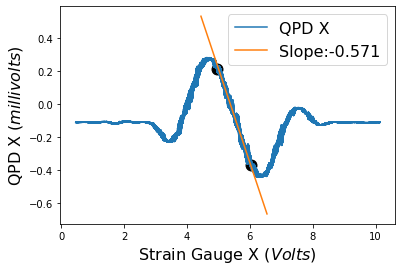

Laser: 125
-1.1385440435369765 6.151274899459074


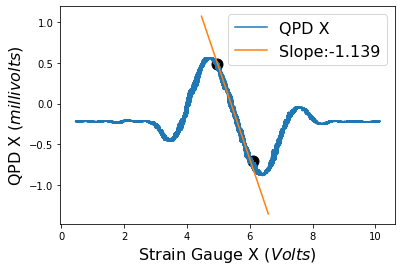

Laser: 150
-1.7018209654529883 9.269776202816786


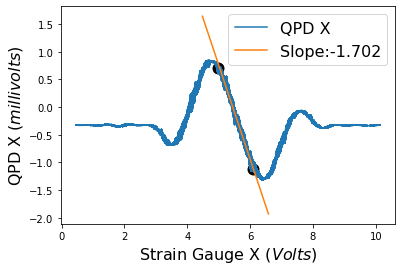

Laser: 175
-2.277435052545562 12.403516787026357


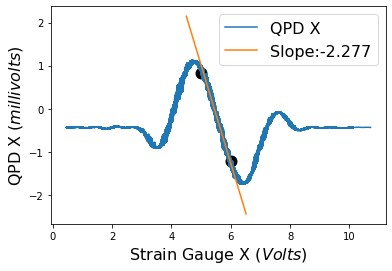

Laser: 200
-2.806063838549949 15.451289098150362


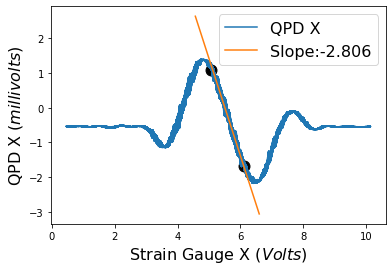

Laser: 100
-0.5885419887545038 3.168397339627159


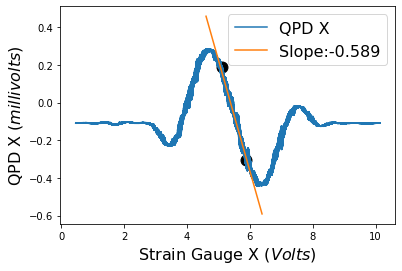

Laser: 125
-1.1838035266280265 6.403487129047309


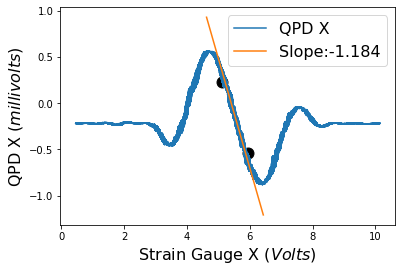

Laser: 150
-1.7516779140098069 9.553690450837717


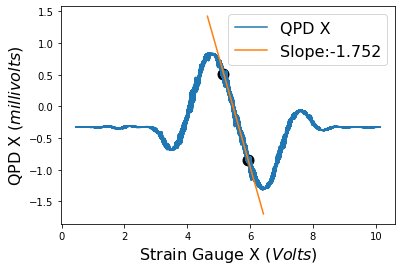

Laser: 175
-2.3451666688605037 12.788250207565195


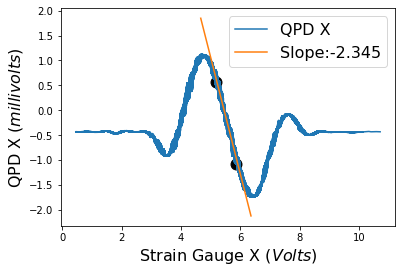

Laser: 200
-2.8876841991387057 15.911468620053336


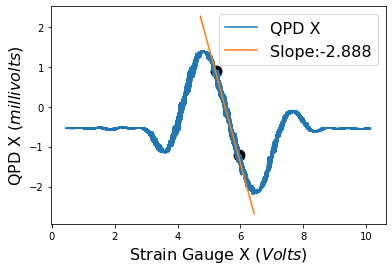

Laser: 100
-0.5822759777541372 3.1357428635409326


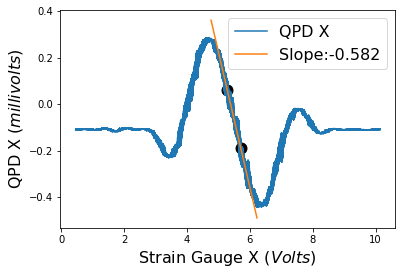

Laser: 125
-1.1676268250385096 6.314809434824932


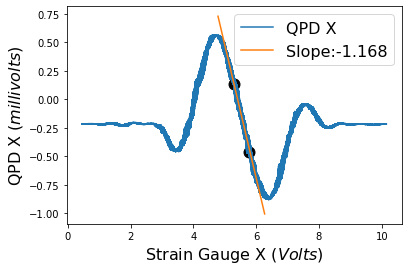

Laser: 150
-1.722295704301216 9.388978556000474


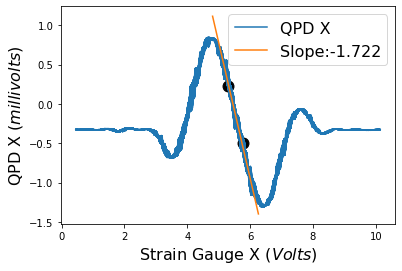

Laser: 175
-2.3570171344209623 12.851055175477876


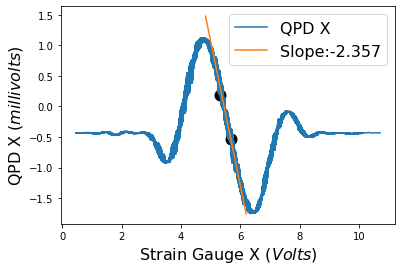

Laser: 200
-3.0420450705088413 16.79230271474394


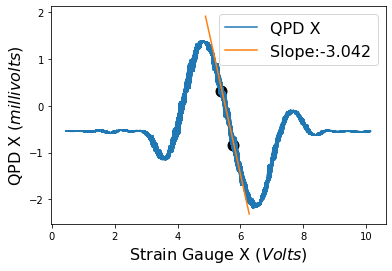

In [6]:
laser=[100,125,150,175,200]
mb_x={lz:[] for lz in laser }

for offset in range(1000,2500,500):
    for lz in laser:
        print(f"Laser: {lz}")
        data = pd.read_csv(f'x_{lz}_vl_bs.txt', sep='\t', 
                          names=["QPD X", "QPD Y", "Piezo X", "Piezo Y"])

        both=zip(data["Piezo X"].values, data["QPD X"].values)
        both=[list(t) for t in zip(*sorted(both))]

        plt.plot(both[0],both[1],label="QPD X")

        max_index=np.argmax(both[1])+offset
        min_index=np.argmin(both[1])-offset

        def fit_func(x, a, b):
            return a*x + b
        params,cov = curve_fit(fit_func, both[0][max_index:min_index], both[1][max_index:min_index])
#         print(params[0])
        [a, b] = params
        print(a,b)
        mb_x[lz].append((a,b))


        xs=np.linspace(both[0][max_index]-0.5,both[0][min_index]+0.5, 50)

        plt.plot(xs,fit_func(xs,a,b), label=f"Slope:{np.around(a,decimals=3):.3f}")
        plt.scatter(both[0][max_index],both[1][max_index],s=120, color="black")
        plt.scatter(both[0][min_index],both[1][min_index],s=120, color="black")
        plt.xlabel("Strain Gauge X $(Volts)$",color="black",fontsize=16)
        plt.ylabel("QPD X $(millivolts)$",color="black",fontsize=16)
        plt.legend(fontsize=16)

        plt.show()

In [7]:
mb_x

{100: [(-0.5711857654236057, 3.0735183352278446),
  (-0.5885419887545038, 3.168397339627159),
  (-0.5822759777541372, 3.1357428635409326)],
 125: [(-1.1385440435369765, 6.151274899459074),
  (-1.1838035266280265, 6.403487129047309),
  (-1.1676268250385096, 6.314809434824932)],
 150: [(-1.7018209654529883, 9.269776202816786),
  (-1.7516779140098069, 9.553690450837717),
  (-1.722295704301216, 9.388978556000474)],
 175: [(-2.277435052545562, 12.403516787026357),
  (-2.3451666688605037, 12.788250207565195),
  (-2.3570171344209623, 12.851055175477876)],
 200: [(-2.806063838549949, 15.451289098150362),
  (-2.8876841991387057, 15.911468620053336),
  (-3.0420450705088413, 16.79230271474394)]}

In [8]:
for lx in laser:
    mb_x[lx]=np.mean([element[0] for element in mb_x[lx]]), np.std([element[1] for element in mb_x[lx]])/np.sqrt(3)
    

In [9]:
mb_x

{100: (-0.5806679106440823, 0.022722343554191688),
 125: (-1.163324798401171, 0.060313467098765),
 150: (-1.7252648612546704, 0.067205188714666),
 175: (-2.3265396186090093, 0.11422117563482001),
 200: (-2.911931036065832, 0.32122170805741096)}

# Y Data For Calibration

Laser: 100
-0.5866953856302579 3.1264794315326645


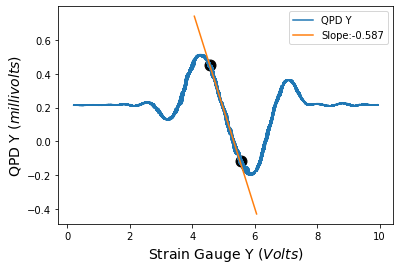

Laser: 125
-1.1610816535611375 6.198024842129659


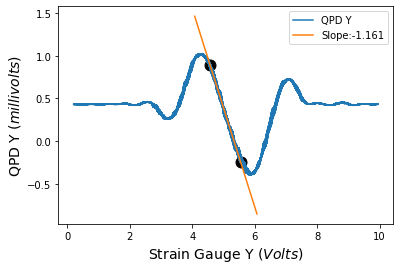

Laser: 150
-1.736750764619273 9.212962189819464


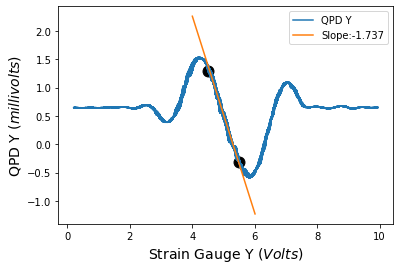

Laser: 175
-2.3075501094870603 12.365522257867736


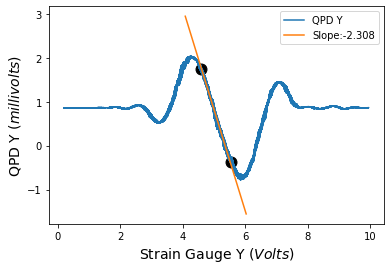

Laser: 200
-2.84370068206362 15.171192328206327


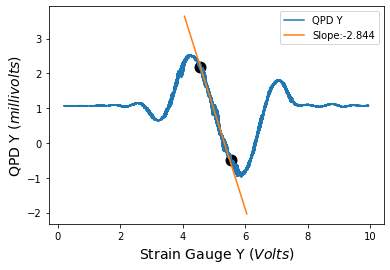

Laser: 100
-0.6048741073242913 3.214641584785832


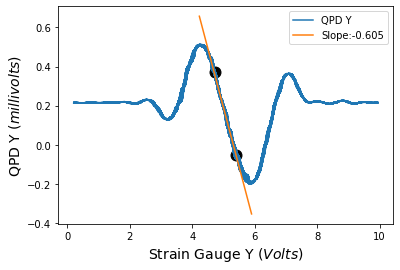

Laser: 125
-1.2087262819192666 6.433748799080278


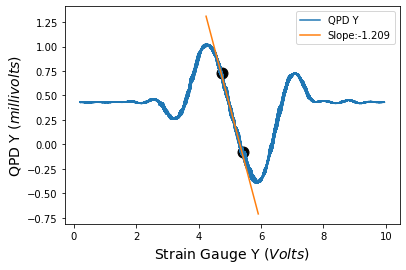

Laser: 150
-1.826010152015107 9.65151192506008


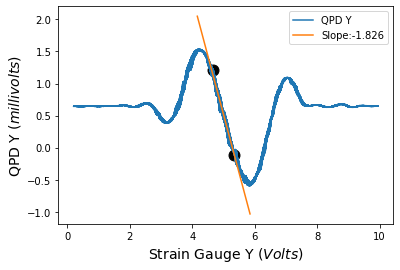

Laser: 175
-2.3687478780352396 12.670468413039545


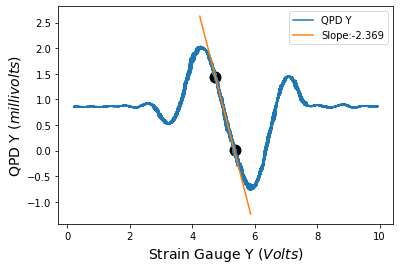

Laser: 200
-2.988926683891834 15.888653628198432


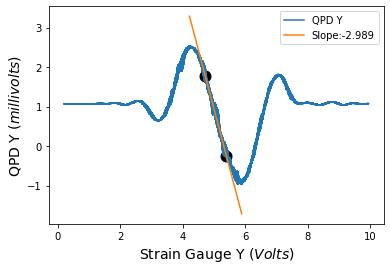

Laser: 100
-0.6159053448405739 3.2693138792097103


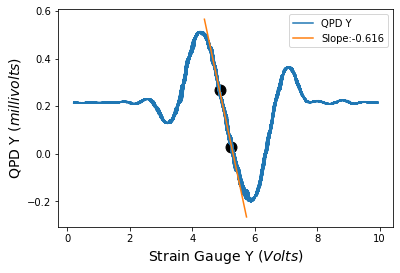

Laser: 125
-1.2583889955000347 6.682490764058108


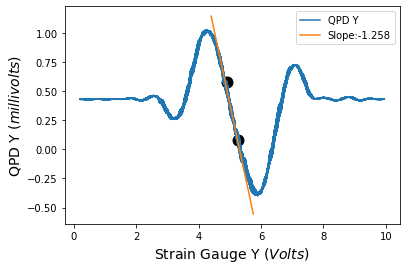

Laser: 150
-1.7887391382740792 9.456383207324928


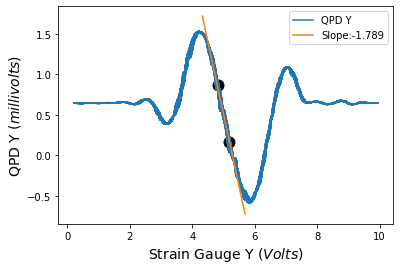

Laser: 175
-2.4195408694859006 12.913932969130652


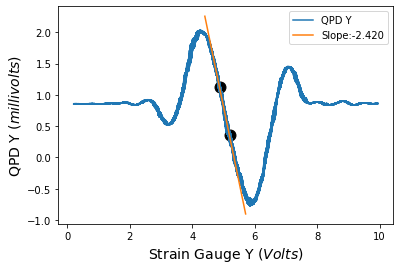

Laser: 200
-3.027274435136593 16.08079978342622


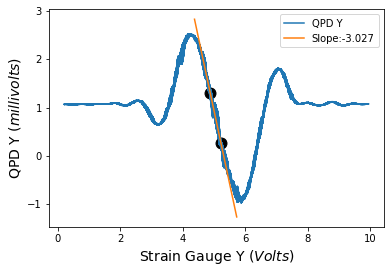

In [10]:
laser=[100,125,150,175,200]
mb_y={lz:[] for lz in laser }

for offset in range(1000,2500,500):
    for lz in laser:
        print(f"Laser: {lz}")
        data = pd.read_csv(f'y_{lz}_vl_bs.txt', sep='\t', 
                          names=["QPD X", "QPD Y", "Piezo X", "Piezo Y"])

        both=zip(data["Piezo Y"].values, data["QPD Y"].values)
        both=[list(t) for t in zip(*sorted(both))]

        plt.plot(both[0],both[1],label="QPD Y")

        max_index=np.argmax(both[1])+offset
        min_index=np.argmin(both[1])-offset


        def fit_func(x, a, b):
            return a*x + b
        params = curve_fit(fit_func, both[0][max_index:min_index], both[1][max_index:min_index])
        [a, b] = params[0]
        print(a,b)
        mb_y[lz].append((a,b))

        xs=np.linspace(both[0][max_index]-0.5,both[0][min_index]+0.5, 50)

        plt.plot(xs,fit_func(xs,a,b), label=f"Slope:{np.around(a,decimals=3):.3f}")
        plt.scatter(both[0][max_index],both[1][max_index],s=120, color="black")
        plt.scatter(both[0][min_index],both[1][min_index],s=120, color="black")
        plt.xlabel("Strain Gauge Y $(Volts)$",color="black",fontsize=14)
        plt.ylabel("QPD Y $(millivolts)$",color="black",fontsize=14)
        plt.legend()

        plt.show()

In [11]:
for lx in laser:
    mb_y[lx]=np.mean([element[0] for element in mb_y[lx]]), np.std([element[1] for element in mb_y[lx]])/np.sqrt(3)
    

In [12]:
mb_y

{100: (-0.6024916125983744, 0.03397346703652663),
 125: (-1.2093989769934794, 0.11420345368901483),
 150: (-1.7838333516361529, 0.10357585849993718),
 175: (-2.3652796190027336, 0.12953212898373698),
 200: (-2.9533006003640154, 0.22600037565904438)}

# Plot of Laser to Slope Values

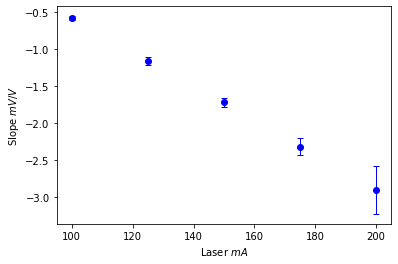

In [13]:
plt.errorbar(laser, [element[0] for element in mb_x.values()], yerr=[element[1] for element in mb_x.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="blue")
plt.xlabel("Laser $mA$")
plt.ylabel("Slope $mV/V$")
plt.show()

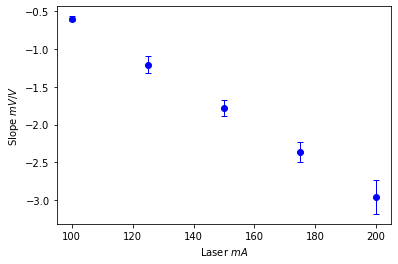

In [14]:
# plt.scatter(laser, [element[0] for element in mb_y.values()])
plt.errorbar(laser, [element[0] for element in mb_y.values()], yerr=[element[1] for element in mb_y.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="blue")
plt.xlabel("Laser $mA$")
plt.ylabel("Slope $mV/V$")
plt.show()

0.04910745082732361
0.02557880719030202


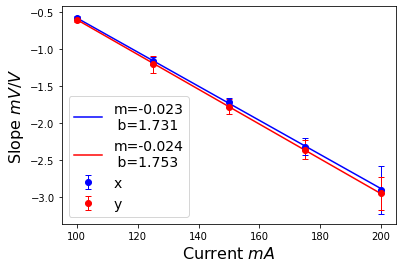

In [18]:
def objective(x, a, b, c):
    return a * x + b
plt.errorbar(laser, [element[0] for element in mb_x.values()], yerr=[element[1] for element in mb_x.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="blue", label="x")

popt, pcov = curve_fit(f=objective, xdata=laser, ydata=[element[0] for element in mb_x.values()], sigma=[element[1] for element in mb_x.values()])
r = np.array([element[0] for element in mb_x.values()]) - objective(np.array(laser),popt[0],popt[1],popt[2])
chisq = sum((r / [element[1] for element in mb_x.values()]) ** 2)
print(chisq)
plt.plot(laser,[objective(x,popt[0],popt[1],popt[2]) for x in laser ], color="blue", label=f"m={np.around(popt[0],decimals=3):.3f}\n b={np.around(popt[1],decimals=3):.3f}")

plt.errorbar(laser, [element[0] for element in mb_y.values()], yerr=[element[1] for element in mb_y.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="red", label="y")

popt, pcov = curve_fit(f=objective, xdata=laser, ydata=[element[0] for element in mb_y.values()], sigma=[element[1] for element in mb_y.values()])
r = np.array([element[0] for element in mb_y.values()]) - objective(np.array(laser),popt[0],popt[1],popt[2])
chisq = sum((r / [element[1] for element in mb_y.values()]) ** 2)
print(chisq)
plt.plot(laser,[objective(x,popt[0],popt[1],popt[2]) for x in laser], label=f"m={np.around(popt[0],decimals=3):.3f}\n b={np.around(popt[1],decimals=3):.3f}", color="red")



plt.legend(fontsize=14)
plt.xlabel("Current $mA$", fontsize=16)
plt.ylabel("Slope $mV/V$", fontsize=16)
plt.savefig("cali", transparent=True, bbox_inches='tight')
plt.show()

0.04910745082732361
0.02557880719030202


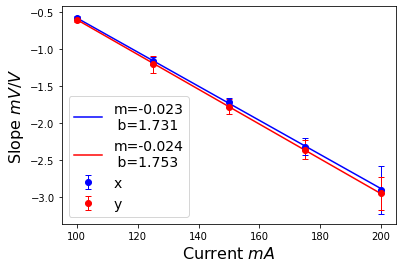

In [19]:
def objective(x, a, b, c):
    return a * x + b

plt.errorbar(laser, [element[0] for element in mb_x.values()], yerr=[element[1] for element in mb_x.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="blue", label="x")

popt, pcov = curve_fit(f=objective, xdata=laser, ydata=[element[0] for element in mb_x.values()], sigma=[element[1] for element in mb_x.values()])
r = np.array([element[0] for element in mb_x.values()]) - objective(np.array(laser),popt[0],popt[1],popt[2])
chisq = sum((r / [element[1] for element in mb_x.values()]) ** 2)
print(chisq)
plt.plot(laser,[objective(x,popt[0],popt[1],popt[2]) for x in laser ], color="blue", label=f"m={np.around(popt[0],decimals=3):.3f}\n b={np.around(popt[1],decimals=3):.3f}")

plt.errorbar(laser, [element[0] for element in mb_y.values()], yerr=[element[1] for element in mb_y.values()], linewidth=1, ls='none', fmt='o', capsize=3,color="red", label="y")

popt, pcov = curve_fit(f=objective, xdata=laser, ydata=[element[0] for element in mb_y.values()], sigma=[element[1] for element in mb_y.values()])
r = np.array([element[0] for element in mb_y.values()]) - objective(np.array(laser),popt[0],popt[1],popt[2])
chisq = sum((r / [element[1] for element in mb_y.values()]) ** 2)
print(chisq)
plt.plot(laser,[objective(x,popt[0],popt[1],popt[2]) for x in laser], label=f"m={np.around(popt[0],decimals=3):.3f}\n b={np.around(popt[1],decimals=3):.3f}", color="red")



plt.legend(fontsize=14)
plt.xlabel("Current $mA$", fontsize=16)
plt.ylabel("Slope $mV/V$", fontsize=16)
plt.savefig("cali", transparent=True, bbox_inches='tight')
plt.show()